# Исследование объявлений о продаже квартир


**Описание проекта**

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name`— название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

**Входные данные:** `/datasets/real_estate_data.csv`

## Открою файл с данными и изучу общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


После прочтения файла я заметила, что данные в таблице разделены некорректно и разделила значения верным образом


In [3]:
data = data.rename(columns ={'cityCenters_nearest':'city_centers_nearest'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Также, название одного столбца выбивалось из остальных, я привела к нижнему регистру и добавила нижнее подчеркивание в качестве разделения слов

Построю гистограммы и численное описание для всех количественных переменных в датасете, чтобы предварительно оценить их распредление 

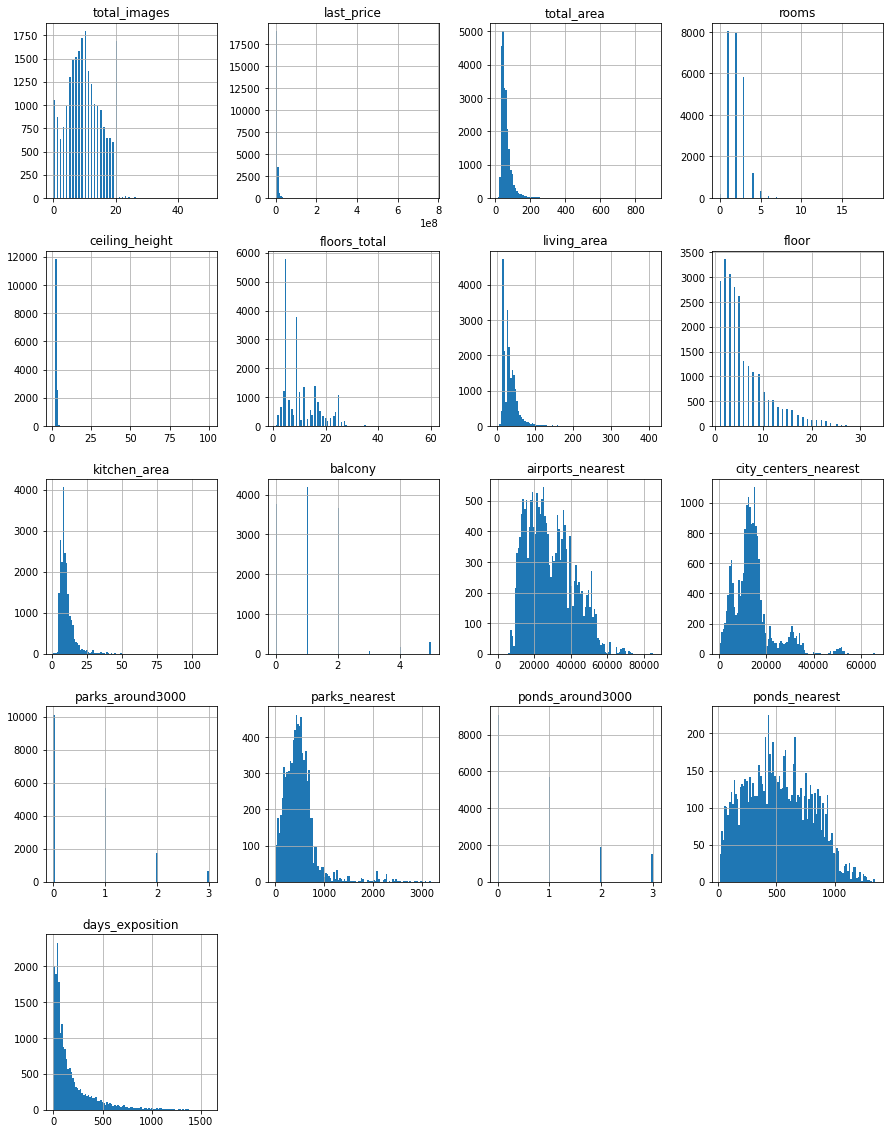

In [4]:
data.hist(bins = 100,figsize =(15,20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По численному описанию данных видно, что в некоторых столбцах присутсвуют аномалии. Далее буду разбираться с ними детальнее

## Предобработка данных

### Работа с пропущеными значениями

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В таких столбцах, как:

`ponds_around3000`, `parks_around3000`, `floors_total` , `airports_nearest` , `city_centers_nearest` , `parks_nearest` ,  `ponds_nearest` , `days_exposition` значения картографические/ заполнялись автоматически, там имеются пропуски. Пропуски в столбцах `ponds_around3000` и `parks_around3000`, я предполагаю, связаны с тем, что по близости их нет, как и пропуски в столбце `balcony` . Поэтому проставляю нули

Что касается названий `locality_name`, `floors_total`, `days_exposition`, `parks_nearest` , `city_centers_nearest` , `ponds_nearest` и `airports_nearest` , предположу, что данные пропущены по неизвестной причине ( может быть вероятность технической неисправности )

В таком случае лучше будет оставить пропуски и передать баг репорт людям, занимающимся выгрузкой и сбором данных

А вот пропущенные значения в столбцах с жилой и кухонной площадью, высотой потолков я считаю нужным и возможным исправить

In [7]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [8]:
 for d in data['rooms'].unique(): 
    
    data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == d), 'living_area'].mean()

Люди сами заполняли метраж квартиры - `living_area`, параметр, на который можно ориентироваться для восстановления этих значений - количество комнат - `rooms`. Добавляю в каждый пропуск среднее метража квартир по количеству комнат

In [9]:
data.loc[(data['kitchen_area'].isna())&((data['studio'] == True)|(data['open_plan'] == True))].fillna(0)

for d in data['total_area'].unique(): 
    
    data.loc[(data['total_area'] == d) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == d), 'kitchen_area'].mean()

Я решила проверить, влияет ли отсутствие значений метража кухни с тем, что квартира является студией или с открытой планировкой. Некоторые пропущеные значения и правда связаны с этим, поэтому заменим такие пропуски пустыми строками

Оставшиеся пропуски заполню средним по общей площади квартиры

In [10]:
data['balcony'] = data['balcony'].fillna(0)

Могу предположить, что пропуски в столбце balcony связаны с неимением в квартирах балконов, поэтому заменяем пропуски числом 0

In [11]:
for b in data['locality_name'].unique(): 
    
    data.loc[(data['locality_name'] == b) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == b), 'ceiling_height'].mean()

`ceiling_height` - высота потолков - это добавленное пользователем значение. В столбце есть пропуски, как по мне, пользователи могли случайно пропустить написание высоты

Лучше всего заменить пропуски средними значениями высоты потолков по регионам квартир - `locality_name`, так как средее по потолкам практически одинаковое с медианой

### Изменение типа данных

В колонках с ценой и кол-м балконов изменю тип на int для удобства

In [12]:
data['last_price'] = data['last_price'].astype('int')

In [13]:
data['balcony'] = data['balcony'].astype('int')

In [14]:
data['is_apartment'] = data['is_apartment'].astype('bool')

В столбце, где буллевы значения `is_apartment` установле тип object, сразу же изменила его на bool и все пропуски в столбце пропали

In [15]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%d'
)

Поменяла тип стоблбца `first_day_exposition` на datetime, время не указывала, так как оно не прописано. В дальнейшем будет удобнее работать со столбцом в формате datetime

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              205
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенных значений стало меньше, но они все равно остались

Некоторые данные люди самы пропустили по неизвестной причине, что-то связано с технической неисправностью

Пропуски тоже важны, поэтому оставляю все как есть

### Работа с дубликатами

In [17]:
data['locality_name'] = data['locality_name'].str.replace("ё","е")

data['locality_name'] = data['locality_name'].str.replace('поселок Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Павлово','село Павлово')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Павлово', 'село Павлово')
data['locality_name'] = data['locality_name'].str.replace('поселок Коммунары', 'Коммунар')
data['locality_name'] = data['locality_name'].str.replace('поселок Любань','Любань')
data['locality_name'] = data['locality_name'].str.replace('поселок Гарболово','деревня Гарболово')
data['locality_name'] = data['locality_name'].str.replace('поселок Зимитицы','деревня Зимитицы')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Мга','поселок городского типа Мга')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Рахья','садовое товарищество Рахья')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Слан

По большей части дубликаты появились из-за разного написания слова 'поселок', кто-то писал его через 'е', другие через 'ё'

Заменила все буквы 'ё' на 'е'

С помощью command f нашал остальние дубликаты перебором названий населенных пунктов, их также исправила

### Работа с аномальными значениями

(0.0, 21.0)

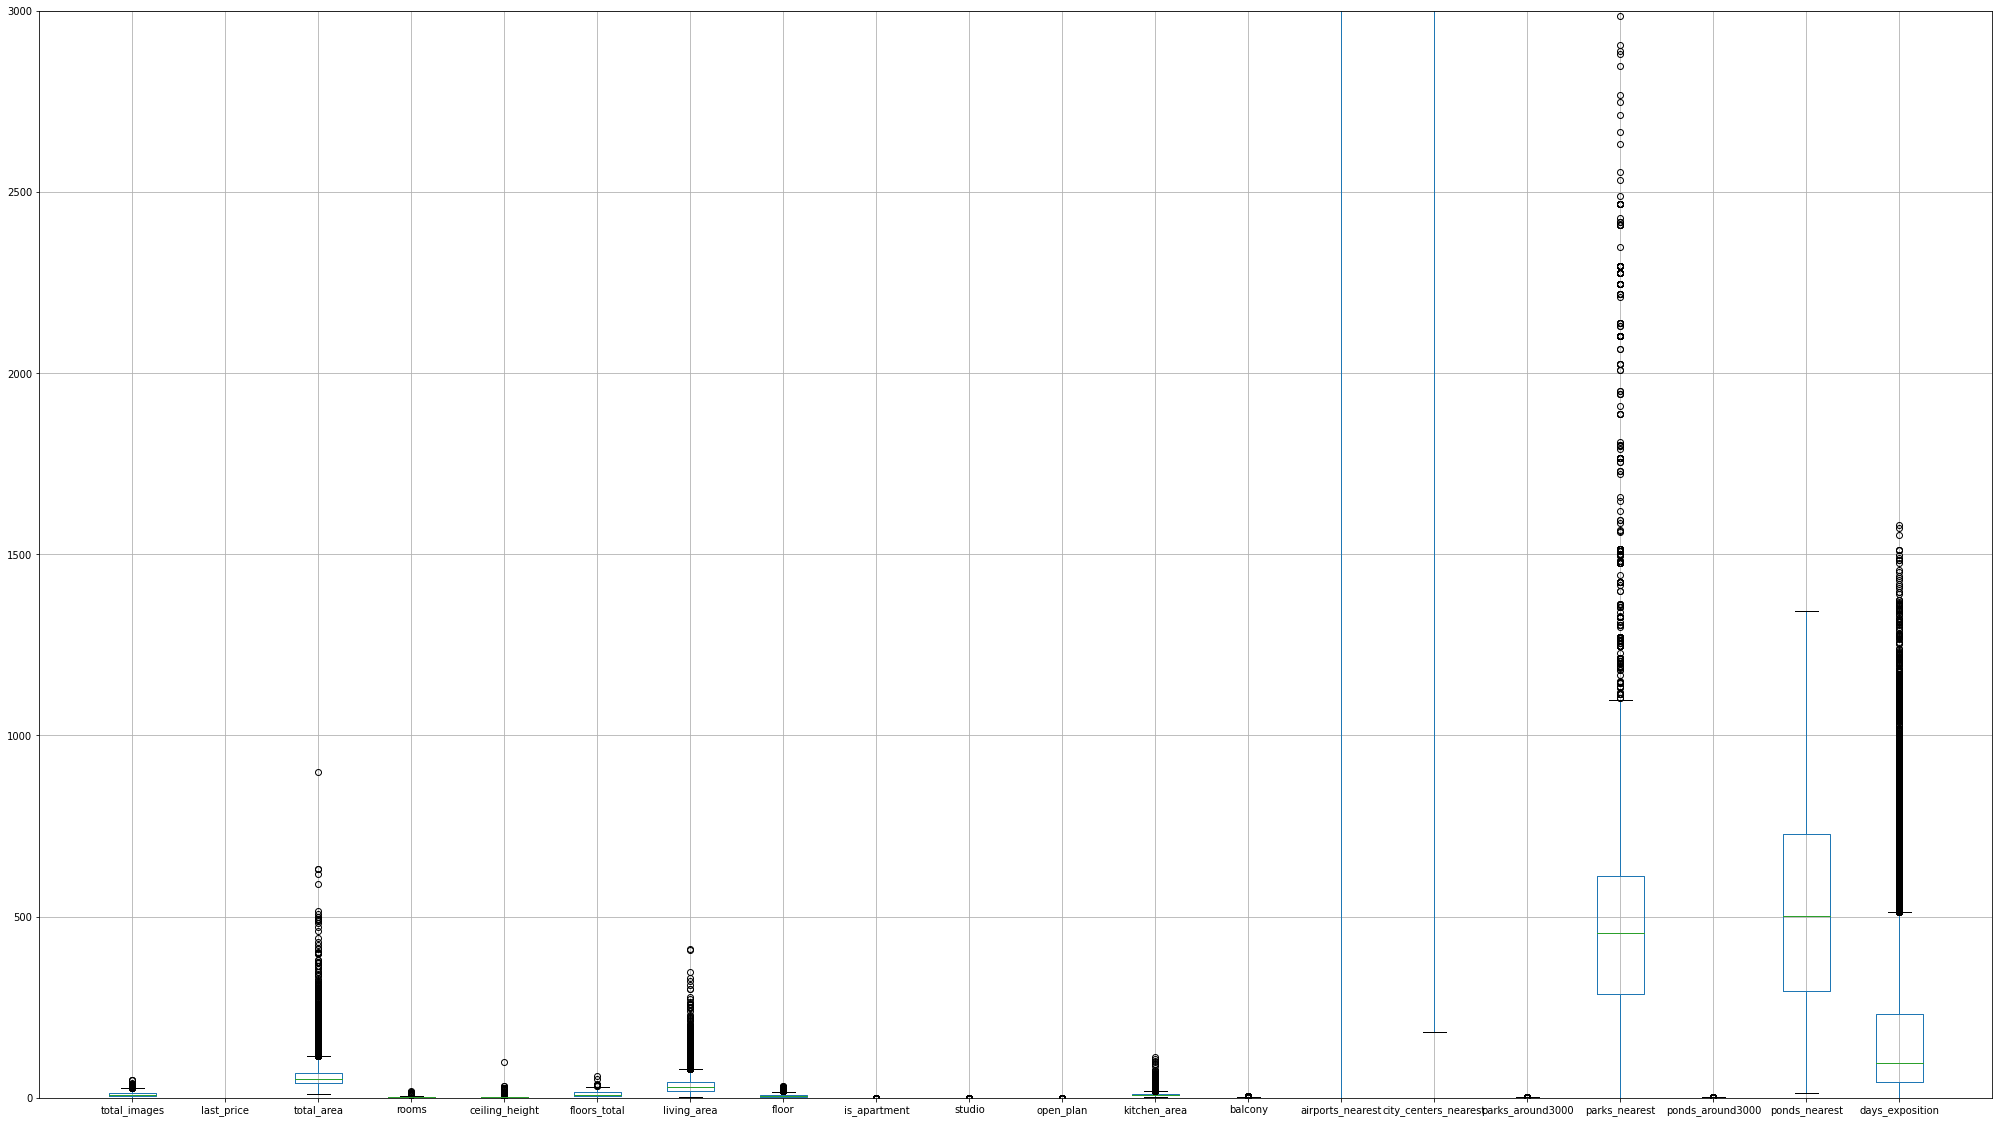

In [18]:
data.boxplot(figsize =(35,20))
plt.ylim(0, 3000)
plt.xlim(0,21)

Для всех числовых значений построила ящик с усами, чтобы просмотреть выбросы

Стоблцы с расстоянием до парков, прудов, центра города и аэропортов имеют много 'выбросов'. Я же могу предположить, что расстояния и правда настолько большие, так что не буду принимать значения за аномалии и оставлю все как есть

Тоже самое обстоит и с количеством дней выставленних объявлений, квартиры действительно могут долго висеть на продаже

Фотографии к объявлениям тоже могут сильно варьироваться в количестве

Та же ситуация и с этажами

А вот с общей общей площадью, жилой, высотой потолков и ценой за квартиру дела обстоят не хорошо, ситуацию нжно исправить

In [19]:
data = data.query('1 <= rooms < 10 and 17 < living_area < 200 and 20 < total_area < 300 and 2.5 < ceiling_height < 5')

data = data.query('last_price > 1000000')
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,16763.000000,1.676300e+04,16763.000000,16763.000000,16763.000000,16695.000000,16763.000000,16763.000000,16662.000000,16763.000000,13471.000000,13491.000000,16763.000000,6249.000000,16763.000000,7024.000000,14525.000000
mean,10.050588,7.296078e+06,65.999180,2.256517,2.791021,10.781851,37.999476,5.917855,11.204529,0.598819,28325.157524,13498.842932,0.520849,491.566491,0.665036,512.027762,187.796971
std,5.797590,8.745420e+06,32.157247,1.021397,0.222979,6.581226,20.330288,4.864700,6.037341,0.995367,11992.860460,8519.205925,0.781431,349.414835,0.933800,277.713417,226.326508
min,0.000000,1.030000e+06,20.100000,1.000000,2.506667,1.000000,17.010000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,2.000000
25%,6.000000,3.900000e+06,45.000000,2.000000,2.650000,5.000000,25.200000,2.000000,8.000000,0.000000,18917.500000,8065.500000,0.000000,287.000000,0.000000,286.000000,45.000000
50%,10.000000,5.300000e+06,58.000000,2.000000,2.800000,9.000000,32.600000,4.000000,10.000000,0.000000,26319.000000,12615.000000,0.000000,451.000000,0.000000,495.000000,100.000000
75%,14.000000,7.900000e+06,76.300000,3.000000,2.803709,16.000000,46.000000,8.000000,12.500000,1.000000,36382.000000,15914.000000,1.000000,610.000000,1.000000,722.000000,241.000000
max,50.000000,3.300000e+08,297.500000,9.000000,4.900000,60.000000,195.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1341.000000,1572.000000


С помощью открытых интернет ресурсов нашла минимальные , максимальные и средние размеры данных, аномалии из которых отбросила

### Посчитаю и добавлю в таблицу новые столбцы

- `metr_price` цена одного квадратного метра;
- `day_exposition` день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month_exposition` месяц публикации объявления;
- `year_exposition` год публикации объявления;
- `type_of_floor` тип этажа квартиры (значения — «первый», «последний», «другой»);
- `km_to_center` расстояние до центра города в километрах.

In [20]:
data['metr_price'] = data['last_price']/data['total_area']

data['day_exposition'] = data['first_day_exposition'].dt.weekday

data['month_exposition'] = data['first_day_exposition'].dt.month

data['year_exposition'] = data['first_day_exposition'].dt.year

def type_of_floor(data): 
    if data['floor'] == 1: 
        return 'Первый этаж'
    if data['floor'] == data['floors_total']: 
        return 'Последний этаж'
    return 'Другой этаж'
data['type_of_floor'] = data.apply(type_of_floor, axis = 1)

data['km_to_center'] = data['city_centers_nearest']/1000 
data['km_to_center'] = data['km_to_center'].round()


## Исследовательский анализ данных

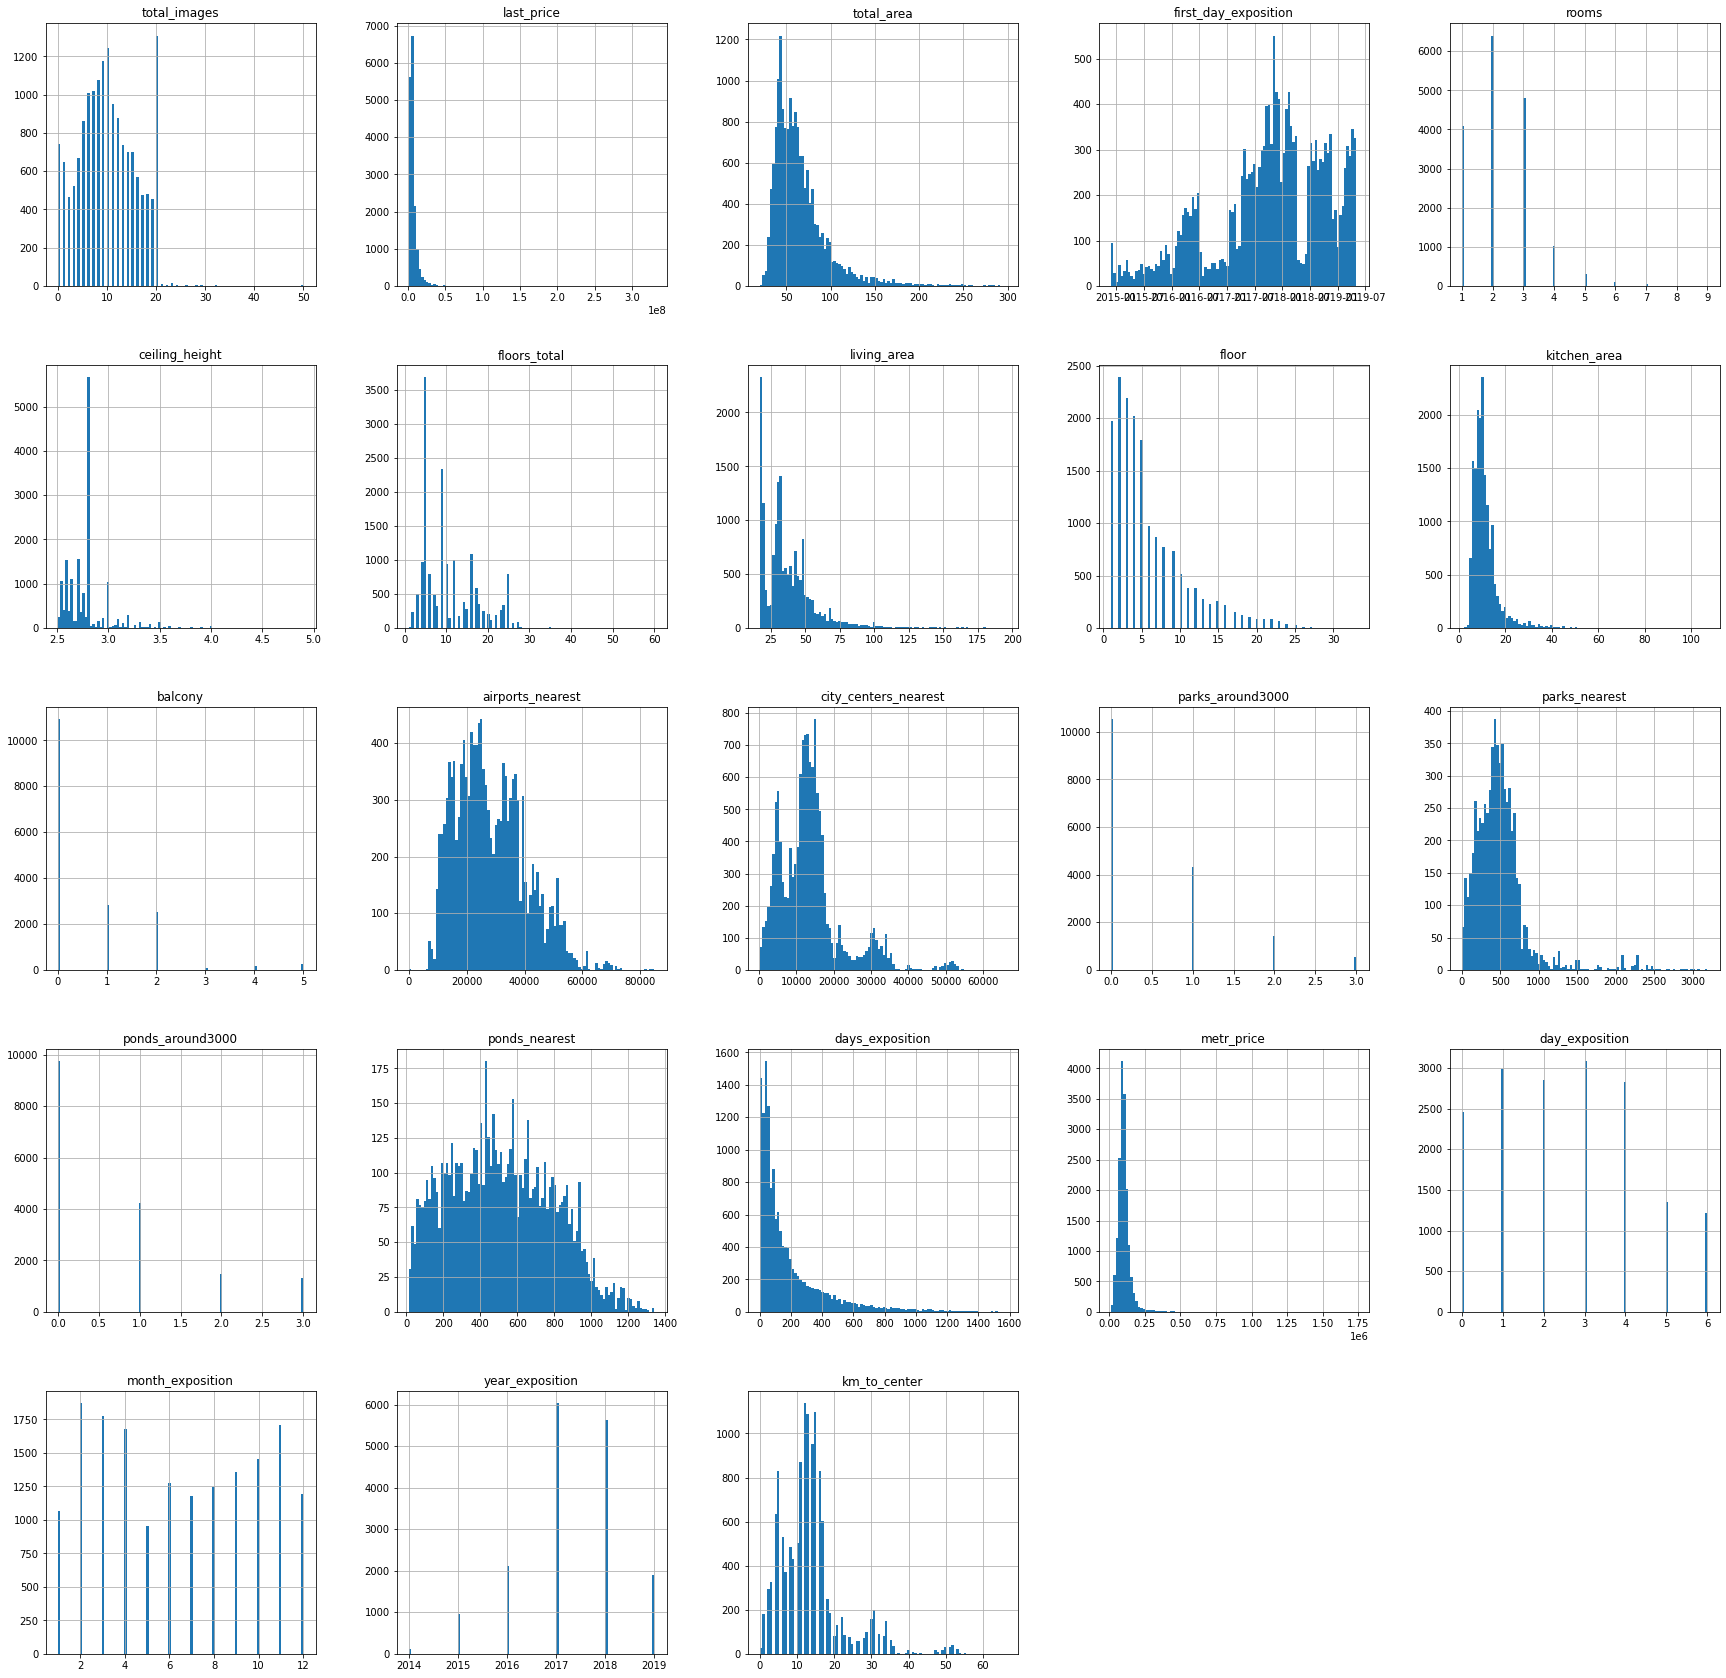

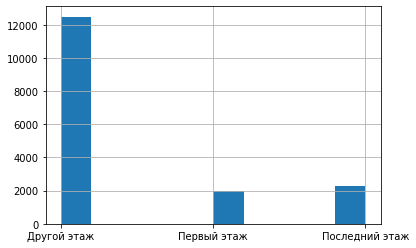

In [21]:
data.hist(bins = 100, figsize =(30,30))
plt.show()
data['type_of_floor'].hist()
plt.show()

**После посторения гистограмм, можно сделать следующие выводы:**

* Большинство квартир стоят от 1 млн до 15 млн, средняя стоимость 7,3 млн, а медиана 5,3 млн. Достаточно редко встречаются варианты с большой площадью и соответствующей ценой

* Чаще всего встречаются квартиры от 30 до 80 кв/м, с жилой площадью от 15 до 40 кв/м и с площадью кухни от 10 до 18 кв/м

* Продавать квартиры начали чаще в 2017-2018 годах

* Обычно, дени выставления объявления - будни,а месяцы выставления - осенние и весенние

* Большинство квартир - пятиэтажные и девятиэтажные. В основном люди выставляют квартиры в таких домах, чаще это другие этажи, не превый/последний

* Чаще всего встречаются двухкомнатные квартиры

* Высота потолков по стандарту 2,8 метра

* Расстояние до центра варьируется от 5 до 18 км

* До ближайшего аэропорта квартиры находятся в районе 20-40 км

* Парков и прудов в Петербурге и области достаточно, расстояние до парков и прудов обычно менее 1 км

### Как быстро продавались квартиры

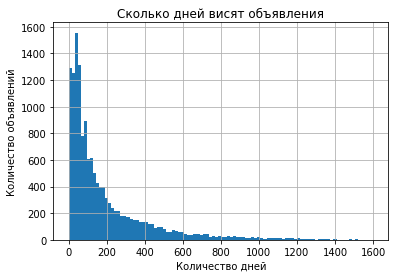

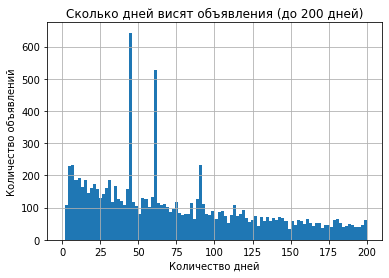

'Количсетво квартир, которые продавались более 550 дней 6.65%'

'Количсетво квартир, которые продавались менее чем за 45 дней 20.51%'

count    14525.000000
mean       187.796971
std        226.326508
min          2.000000
25%         45.000000
50%        100.000000
75%        241.000000
max       1572.000000
Name: days_exposition, dtype: float64

45.0    552
60.0    455
90.0    182
7.0     156
30.0    141
4.0     121
5.0     108
3.0     104
11.0     98
9.0      97
Name: days_exposition, dtype: int64

In [22]:
data['days_exposition'].plot(kind ='hist',grid=True, bins = 100, range =(0,1600), title = 'Сколько дней висят объявления' )
plt.xlabel("Количество дней")
plt.ylabel("Количество объявлений")
plt.show()
data['days_exposition'].plot(y ='days_exposition', kind ='hist',grid=True, bins = 100, range =(0,200), title = 'Сколько дней висят объявления (до 200 дней)')
plt.xlabel("Количество дней")
plt.ylabel("Количество объявлений")
plt.show()

display('Количсетво квартир, которые продавались более 550 дней {0}%'.format(round(len(data.query('days_exposition >= 550')) / len(data) * 100, 2)))
display('Количсетво квартир, которые продавались менее чем за 45 дней {0}%'.format(round(len(data.query('days_exposition <= 45')) / len(data) * 100, 2)))

display(data['days_exposition'].describe())
data['days_exposition'].value_counts(). head(10)

Большинство объявлений висит до 400 дней, медианное значение продажи квартир - 100 дней, среднее - практически 200.
Достаточно правдоподобно, некоторые квартиры продаются быстрее, некоторые дольше

Ранее я выводила ящик с усами для всех количественных значений, по нему можно сделать вывод, что более 550 дней с момента публикации объявления считается выбросом. Это квартиры, которые продавались слишком долго. Правда таких квартир в меньшенстве - 7%

Возможно это квартиры, котрые уже купили через другой канал, но объявления все еще остались и тд

Также присутствуют квартиры, которые покупали быстрее. Межквартильный размаз вывел минимальные значение от 45 дней, меньшие значения можно назвать очень быстрыми. Количество быстро проданных квартир составляет уже 20%

Не ситчаю нужным исключать значения слишком бысто и долго продаваемых квартир, чтобы не лишится данных

А медиана не сильно отличается, если отбросить, например, сишком долгие продажи( если отбросить - 90 дней, оставить как есть - 100)

Я решила проверить по графику дни объявления до 200 и с большей детализированостью. Оказалось, что на 45, 60, 90,7 и 30 дни вывески объявления чаще всего квартиры продаются

### Влияние разных факторов на полную стоимость объекта

,last_price,total_area,living_area,kitchen_area,rooms,floor,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.667139,0.558675,0.514969,0.378570,0.019409,-0.011150,-0.000829,-0.037163
total_area,0.667139,1.000000,0.911504,0.608760,0.770820,-0.020549,-0.018917,0.009018,-0.076284
living_area,0.558675,0.911504,1.000000,0.397253,0.860765,-0.095113,-0.019168,0.002752,-0.071260
kitchen_area,0.514969,0.608760,0.397253,1.000000,0.270253,0.106642,-0.014780,0.001498,-0.035779
rooms,0.378570,0.770820,0.860765,0.270253,1.000000,-0.138050,-0.014068,0.003584,-0.053505
floor,0.019409,-0.020549,-0.095113,0.106642,-0.138050,1.000000,0.022493,0.012575,0.027460
day_exposition,-0.011150,-0.018917,-0.019168,-0.014780,-0.014068,0.022493,1.000000,0.021413,-0.000559
month_exposition,-0.000829,0.009018,0.002752,0.001498,0.003584,0.012575,0.021413,1.000000,-0.264605
year_exposition,-0.037163,-0.076284,-0.071260,-0.035779,-0.053505,0.027460,-0.000559,-0.264605,1.000000


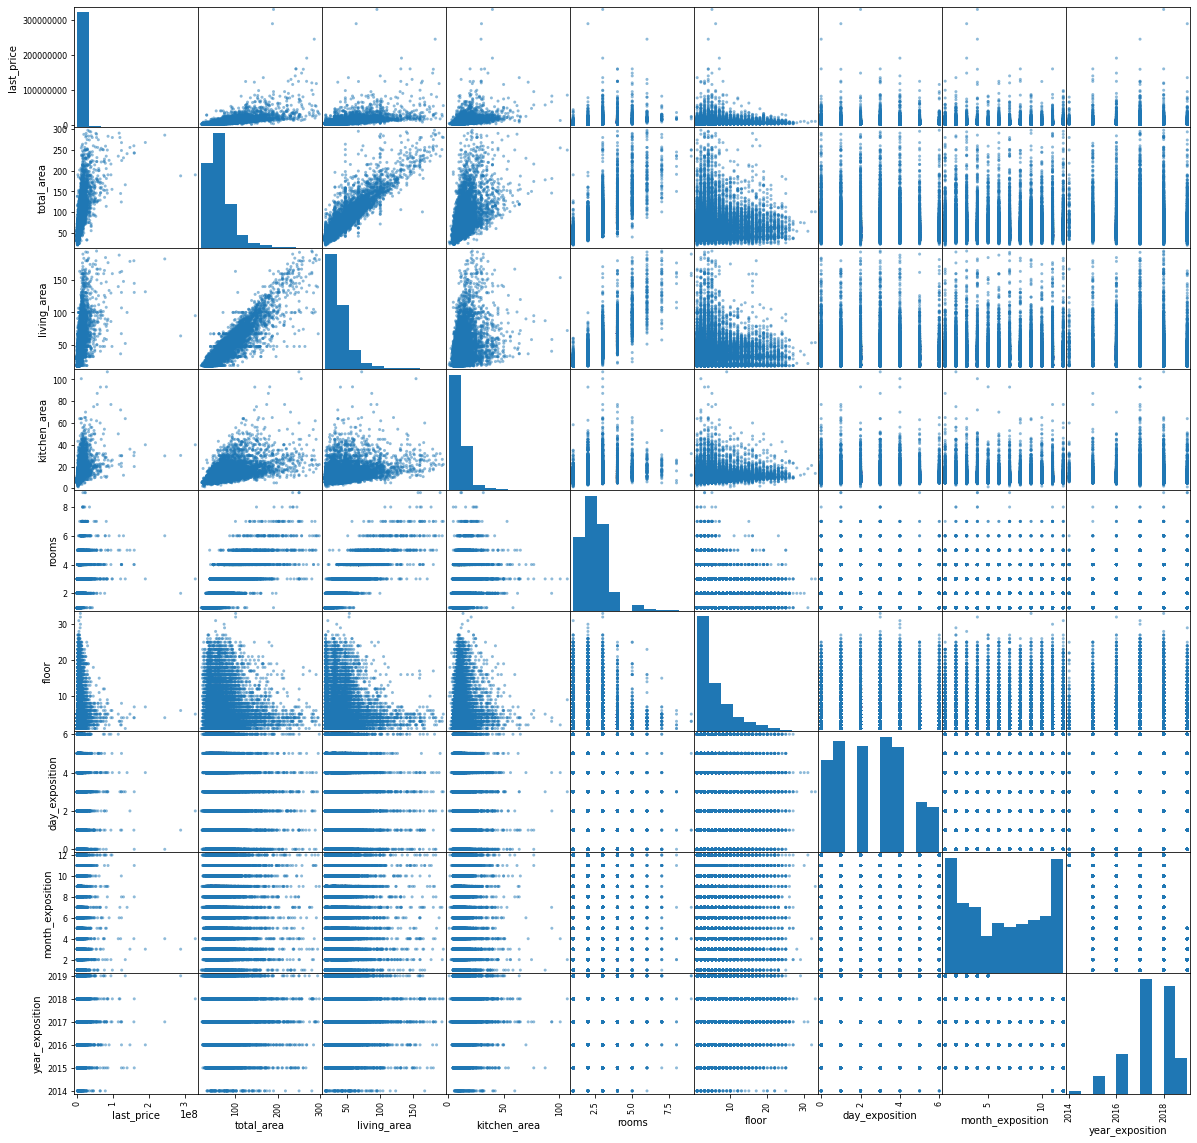

,count,median
type_of_floor,,
Другой этаж,12485,5500000
Последний этаж,2300,5000000
Первый этаж,1978,4300000


,count,median
rooms,,
9,3,22250000
7,42,20750000
8,7,18000000
6,91,17500000
5,298,13800000
4,1027,9900000
3,4805,6700000
2,6400,5100000
1,4090,3850000


,count,median
day_exposition,,
0,2464,5400000.0
3,3081,5400000.0
1,2983,5325000.0
2,2846,5300000.0
4,2823,5250000.0
5,1354,5199499.5
6,1212,5150000.0


,count,median
month_exposition,,
9,1361,5500000
4,1681,5437000
12,1194,5400000
8,1246,5370000
1,1063,5350000
3,1779,5350000
2,1871,5300000
7,1176,5300000
10,1458,5300000


,count,median
year_exposition,,
2014,124,8681628
2015,949,5911757
2019,1902,5900000
2018,5644,5300000
2016,2108,5100000
2017,6036,5050000


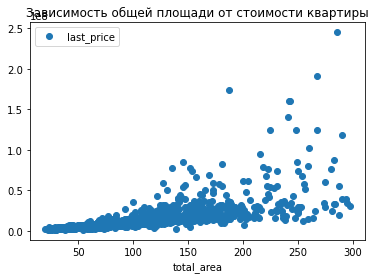

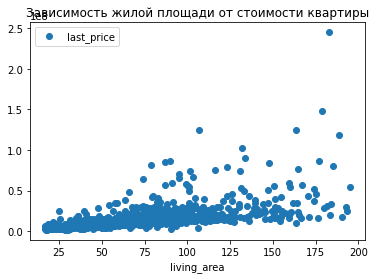

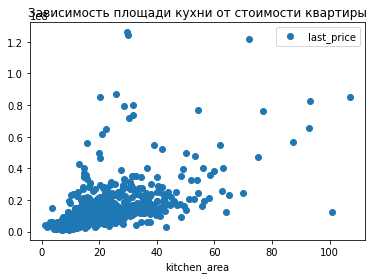

In [23]:
corr_price = data[['last_price','total_area','living_area','kitchen_area','rooms','floor', 'day_exposition','month_exposition','year_exposition']]
display(corr_price.corr())

pd.plotting.scatter_matrix(corr_price, figsize=(20, 20)) 
plt.show()

corr_total = data.pivot_table(index ='total_area', values = 'last_price', aggfunc=['count','median'])
corr_total.plot(y = 'median', style ='o', title = 'Зависимость общей площади от стоимости квартиры')

corr_living = data.pivot_table(index ='living_area', values = 'last_price', aggfunc=['count','median'])
corr_living.plot(y = 'median', style ='o', title = 'Зависимость жилой площади от стоимости квартиры')

corr_kitchen = data.pivot_table(index ='kitchen_area', values = 'last_price', aggfunc=['count','median'])
corr_kitchen.plot(y = 'median', style ='o', title = 'Зависимость площади кухни от стоимости квартиры')


corr_floor = data.pivot_table(index ='type_of_floor', values = 'last_price', aggfunc=['count','median'])
corr_floor.columns = ('count','median')
display(corr_floor.sort_values(by = 'median', ascending = False))
corr_rooms = data.pivot_table(index ='rooms', values = 'last_price', aggfunc=['count','median'])
corr_rooms.columns = ('count','median')
display(corr_rooms.sort_values(by = 'median', ascending = False))
corr_day = data.pivot_table(index ='day_exposition', values = 'last_price', aggfunc=['count','median'])
corr_day.columns = ('count','median')
display(corr_day.sort_values(by = 'median', ascending = False))
corr_month = data.pivot_table(index ='month_exposition', values = 'last_price', aggfunc=['count','median'])
corr_month.columns = ('count','median')
display(corr_month.sort_values(by = 'median', ascending = False))
corr_year = data.pivot_table(index ='year_exposition', values = 'last_price', aggfunc=['count','median'])
corr_year.columns = ('count','median')
display(corr_year.sort_values(by = 'median', ascending = False))

Больше всего на ценообразование стоимости квартиры влияет общая площадь ( корреляция 0,7 ), после уже жилая ( 0,6 ) и кухонная ( 0,5 ) площади, еще меньше влияет количество комнат ( 0,4 )

День, месяц, год публикации объявления и этаж квартиры меньше всего определяют цену объекта

* Чем больше площадь квартиры, тем больше и ее цена. Тоже самое касается жилой и кухонной площадей. Их влияние правда чуть меньше, чем от общей площади

* Тоже самое и с кличеством комнат. Чем больше комнат, тем выше цена. Правда самих квартир с большим кол-м комнат меньше

* Квартиры на первом этаже стоят дешевле, чем на остальных

* Чаще всего, квартиры выставляю по будням. Цены с пн по пт в среднем одинаковые. А вот квартир в сб и вс выставлено меньше, и цена их ниже

* Во все месяца квартиры примерно с одинаковой средней стоимостью, при этом в конце весны и в начале лета квартиры выставляют дешевле

* В 2014 году квартиры стоили дороже всего - медианное значение +- 9 млн, после цена резко спала до +- 6-5 млн и оставшиеся годы держется на одном уровне


### Средняя цена метра в самых популярных городах

,count_of_expositions,mean_price_one_metr
locality_name,,
Санкт-Петербург,11869,116369.925982
Мурино,325,81666.825301
поселок Шушары,322,75648.442316
Всеволожск,294,67081.508665
Пушкин,256,104734.072654
Гатчина,207,68763.390398
Колпино,203,73840.232464
поселок Парголово,194,84468.995216
деревня Кудрово,185,90676.406025


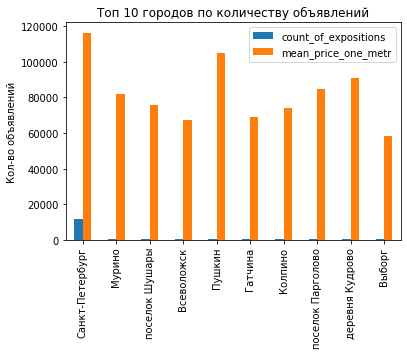

In [24]:
often_localty = data.pivot_table(index = 'locality_name', values = 'metr_price', aggfunc =['count','mean'])
often_localty.columns = ('count_of_expositions','mean_price_one_metr')
often_localty = often_localty.sort_values(by = 'count_of_expositions', ascending = False). head(10)
display(often_localty)
often_localty.plot(kind = 'bar');
plt.title('Топ 10 городов по количеству объявлений');
plt.ylabel('Кол-во объявлений');
plt.xlabel(None);

10 самых популярных населенных пунктов СПБ и ЛО по количеству обьявлений с недвижимостью и средняя цена за квадратный метр

In [25]:
often_localty[often_localty['mean_price_one_metr'] == often_localty['mean_price_one_metr'].min()]

,count_of_expositions,mean_price_one_metr
locality_name,,
Выборг,175,58540.839389


Самый дешевый кв/м стоит 58 540 рублей за квартиру в городе Выборг

In [26]:
often_localty[often_localty['mean_price_one_metr'] == often_localty['mean_price_one_metr'].max()]

,count_of_expositions,mean_price_one_metr
locality_name,,
Санкт-Петербург,11869,116369.925982


Самый дорогой кв/м за квартиру в Санкт-Петербурге, стоимостью 116 369 рублей

### Средняя цена за км до центра в Санкт-Петербурге

In [27]:
center_piter = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'km_to_center', values = 'metr_price')
center_piter.sort_values('metr_price', ascending = False)

,metr_price
km_to_center,
0.0,245833.530289
27.0,193918.918919
1.0,178255.132244
7.0,158510.532172
2.0,155512.001780
6.0,149300.126504
5.0,137445.690585
4.0,129289.886680
8.0,125551.481857


Что и следовало ожидать

Средняя цена за метр и правда зависит от расстояния до центра города. Чем ближе к центру, тем дороже стоит квартира

Единственное выбивающееся значение - это при расстоянии до центра за 27 км, цена за метр в среднем составляет 	193 919 рублей

Вероятно, на этом расстоянии находится дорогостоящий район 

## Общий вывод

Я провела исследовательский анализ данных в Яндекс Недвижимости и могу сделать следующий выводы:

1. Для начала я проверила данные на различные недочеты и сделала предобработку:
* Определила пропущенные значения, избавилась и заменила их по возможности;
* Изменила тип данных в некоторых столбцах, чтобы удобнее было проводить анализ;
* Нашла неявные дубликаты и заменила их, чтобы повоторы полностью пропали;
* Оценила реалистичность данных, выявила аномальные значения и исключила их из анализа

2. Квартиры продаются в среднем за 200 дней(медианное значение - 100 дней), чаще всего объявления висят до 400 дней. В опеределенные дни выставления объявления продажи квартир очень частые (на 45, 60, 90, 7 и 30 днях), это связано с [условиями бесплатного размещения объявлений сервиса Яндекс Недвижимости](https://yandex.ru/support/realty/paid.html). Некоторые квартиры весят в объявлении менее 45 дней - их всего 20%. А другие квартиры наоборот, вывешены слишком долго, более 550 дней, их доля составляет 7%


3. Больше всего на стоимость квартиры влияют следющий параметры:

* Чем больше площадь квартиры, тем больше и ее цена (корреляция 0,7). Тоже самое касается жилой (корреляция 0,6) и кухонной (корреляция 0,5) площадей

* Тоже самое и с кличеством комнат (корреляция 0,4). Чем больше комнат, тем выше цена. Но количество самих квартир с большим кол-м комнат меньше

* Квартиры на первом этаже стоят дешевле - медианное значение 4,3 млн р, а на остальных этажах - медианное значение 5-5,5 млн р

* Чаще всего, квартиры выставляю по будням. Цены с пн по пт в среднем одинаковые - медианное значение 5,3 - 5,4 млн р. А вот квартир в сб и вс выставлено меньше, и цена их немного ниже - 5,2 млн р

* Во все месяца квартиры примерно с одинаковой средней стоимостью - медианное значение 5,3 - 5,5 млн р, при этом в мае и июне квартиры выставляют дешевле - 5 млн р

* В 2014 году квартиры стоили дороже всего - медианное значение +- 9 млн, после цена резко спала до +- 6-5 млн и оставшиеся годы удерживается на одном уровне

4. 10 самых популярных городов по выставленнм обявлениям в СПБ и ЛО области:
* Санкт-Петербург	
* Мурино
* поселок Шушары
* Всеволожск
* Пушкин
* Гатчина
* Колпино
* поселок Парголово
* деревня Кудрово
* Выборг	

* Минимальная цена за кв/м 58 540 рублей за квартиру в городе Выборг

* Максимальная цена за кв/м 116 369 рублейза квартиру в Санкт-Петербурге

5. Выяснила, что средняя цена за кв/м зависит от расстояния до центра города. Чем ближе к центру, тем дороже стоит квартира. Единственное выбивающееся и высокое значение цена за метр - это при расстоянии до центра за 27 км, цена за метр в среднем составляет 193 919 рублей. Скорее всего там находится район с элитной недвижимостью